In [212]:
import pandas as pd
import numpy as np

In [213]:
data =pd.read_csv('data/Heart.csv')

In [214]:
data = data.drop(data.columns[0], axis=1)

In [215]:
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [216]:
X = data.loc[:,'Age':'Thal']
y = data.loc[:,'AHD']

In [217]:
X = pd.get_dummies(X).fillna(0)
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

In [218]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [219]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [220]:
def plot(model,X_test,y_test,X,y):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    disp = plot_confusion_matrix(model, X_test, y_test,
                                    display_labels=['No','Yes'],
                                    cmap=plt.cm.Blues,
                                    normalize='true')
    disp.ax_.set_title('Confusion Matrix')
    print(f"Score is {cross_val_score(model,X=X,y=y,cv=5,scoring='roc_auc').mean():.4f}")
    # print(disp.confusion_matrix)

In [221]:
from sklearn.model_selection import GridSearchCV
def grid_search(model, params,X,y):
    clf = GridSearchCV(model, params, cv=5)
    clf.fit(X, y)
    print(clf.best_params_)

In [222]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
tree_para = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}
grid_search(decision_tree, tree_para,X,y)

{'criterion': 'gini', 'max_depth': 3}


Score is 0.8385


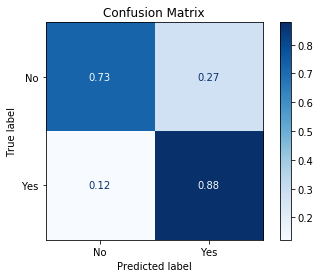

In [223]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
decision_tree.fit(X_train,y_train)
plot(decision_tree,X_test,y_test,X,y)

In [224]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=decision_tree, n_jobs =-1)
tree_para = {'n_estimators':[10,20,50,100,150,200],'max_samples':[0.1,0.3,0.5,1.0]}
grid_search(bagging, tree_para,X,y)

{'max_samples': 0.1, 'n_estimators': 200}


Score is 0.9085


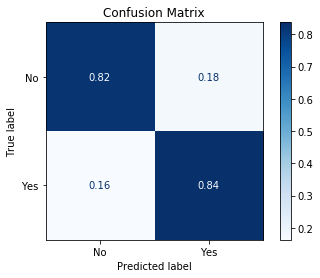

In [236]:
bagging = BaggingClassifier(base_estimator=decision_tree,n_estimators= 200 ,max_samples =0.1, n_jobs=-1)
bagging.fit(X_train,y_train)
plot(bagging,X_test,y_test,X,y)

In [226]:
from sklearn.ensemble import GradientBoostingClassifier
boosting = GradientBoostingClassifier()
tree_para = {'n_estimators':[10,20,50,100,200,300],'max_depth':[1,5,10,20,50,100]}
grid_search(boosting, tree_para,X,y)

{'max_depth': 1, 'n_estimators': 20}


Score is 0.9005


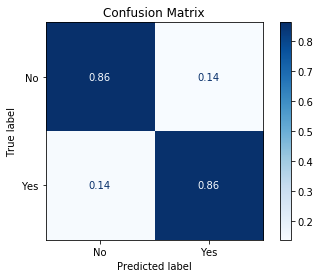

In [227]:
boosting = GradientBoostingClassifier(max_depth=1,n_estimators=20)
boosting.fit(X_train,y_train)
plot(boosting,X_test,y_test,X,y)

Score is 0.9111


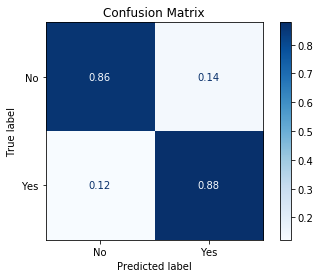

In [228]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
plot(model,X_test,y_test,X,y)

In [229]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
fit_X = lda.fit_transform(X,y)
fit_X_train = lda.transform(X_train)
fit_X_test = lda.transform(X_test)

In [230]:
tree_para = {'max_depth':[1,2,3,5,10,20,25]}
forest = RandomForestClassifier(random_state=0, n_jobs =-1)
grid_search(forest, tree_para,fit_X,y)

{'max_depth': 1}


Score is 0.9015


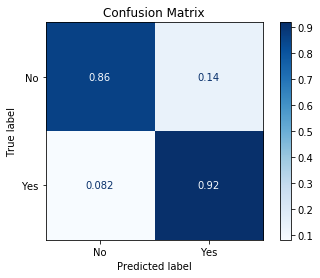

In [231]:
forest = RandomForestClassifier(random_state=0, n_jobs =-1,max_depth =1)
forest.fit(fit_X_train,y_train)
plot(forest,fit_X_test,y_test,fit_X,y)

In [232]:
from sklearn import svm
svc_params = {'C':[0.2,0.5,1.0],'kernel':['linear','poly','rbf','sigmoid'],'degree':[2,3,5]}
svc = svm.SVC()
grid_search(svc,svc_params,X,y)


{'C': 0.5, 'degree': 3, 'kernel': 'poly'}


Score is 0.9063


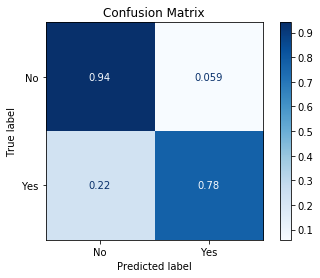

In [233]:
svc = svm.SVC(C=0.5,kernel='poly',degree=3)
svc.fit(X_train,y_train)
plot(svc,X_test,y_test,X,y)

In [234]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=svc, n_jobs =-1)
tree_para = {'n_estimators':[10,20,50,100,150,200],'max_samples':[0.1,0.3,0.5,1.0]}
grid_search(bagging, tree_para,X,y)

{'max_samples': 1.0, 'n_estimators': 20}


Score is 0.9068


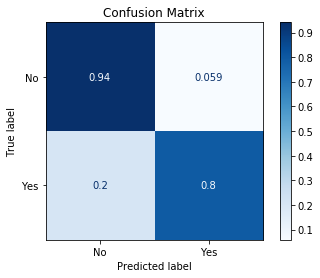

In [237]:
bagging = BaggingClassifier(base_estimator=svc,n_estimators= 20 ,max_samples =1.0, n_jobs=-1)
bagging.fit(X_train,y_train)
plot(bagging,X_test,y_test,X,y)